# Logistic Regression

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
churn_df = pd.read_csv('data/ChurnData.csv')
churn_df.head(10)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0.0,0.0,3.030,3.240,4.787,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,8.25,...,0.0,1.0,1.0,1.0,1.0,2.110,3.157,3.611,4.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,2.90,...,0.0,0.0,0.0,0.0,0.0,1.065,3.240,2.833,1.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,6.50,...,0.0,0.0,1.0,1.0,0.0,1.872,3.314,4.942,3.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,12.85,...,0.0,1.0,1.0,0.0,1.0,2.553,3.248,4.143,2.0,0.0


In [3]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn', 'callcard', 'wireless']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head(10)

,tenure,age,address,income,ed,employ,equip,churn,callcard,wireless
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1,0.0,0.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0,1.0,1.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0,1.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,0,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,0,1.0,1.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0,0.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,0,1.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,0,1.0,0.0


In [4]:
x = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless']])
x[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   1.,   0.]])

In [5]:
y = np.asanyarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [6]:
x_norm = StandardScaler().fit(x).transform(x)
x_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148]])

In [7]:
# split train test data
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=4)

In [8]:
lr = LogisticRegression().fit(x_train, y_train)
yhat = lr.predict(x_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [9]:
yhat_prob = lr.predict_proba(x_test)
yhat_prob[:10]

array([[0.90733735, 0.09266265],
       [0.77549537, 0.22450463],
       [0.66214559, 0.33785441],
       [0.96848664, 0.03151336],
       [0.75356895, 0.24643105],
       [0.8862658 , 0.1137342 ],
       [0.7345777 , 0.2654223 ],
       [0.71652816, 0.28347184],
       [0.31812949, 0.68187051],
       [0.84908301, 0.15091699]])

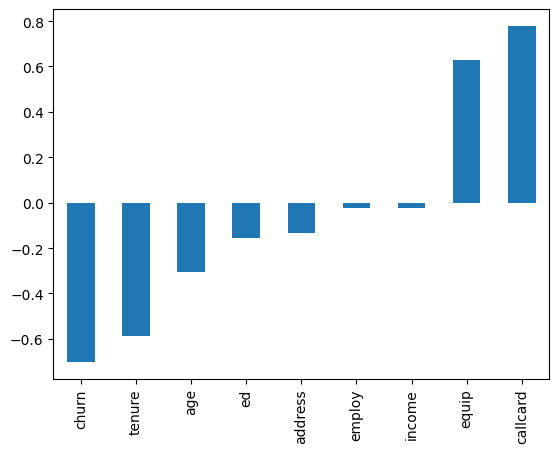

In [10]:
coefficients = pd.Series(lr.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='bar')
plt.show()

In [11]:
log_loss(y_test, yhat_prob)

0.7760557225417114